In [19]:
import pandas as pd
import numpy as np
import techniques
import matplotlib.pyplot as plt

In [20]:
bcancer_df = pd.read_csv("breast_cancer.csv")
bcancer_df = bcancer_df.sample(frac=1).reset_index(drop=True)
bcancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,8711003,B,12.25,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.023310,...,25.22,86.60,564.2,0.1217,0.1788,0.19430,0.08211,0.3113,0.08132,NaN
1,9113156,B,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.017370,...,31.98,100.40,734.6,0.1017,0.1460,0.14720,0.05563,0.2345,0.06464,NaN
2,91903902,B,13.68,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.018800,...,20.20,101.60,773.4,0.1264,0.1564,0.12060,0.08704,0.2806,0.07782,NaN
3,888264,M,17.35,23.06,111.00,933.1,0.08662,0.06290,0.02891,0.028370,...,31.47,128.20,1218.0,0.1240,0.1486,0.12110,0.08235,0.2452,0.06515,NaN
4,861103,B,11.45,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.022330,...,32.16,84.53,525.1,0.1557,0.1676,0.17550,0.06127,0.2762,0.08851,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,874662,B,11.81,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.015530,...,26.48,79.57,489.5,0.1356,0.1000,0.08803,0.04306,0.3200,0.06576,NaN
565,893988,B,11.54,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,...,12.87,81.23,467.8,0.1092,0.1626,0.08324,0.04715,0.3390,0.07434,NaN
566,894326,M,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.079500,...,25.00,140.90,1485.0,0.1434,0.2763,0.38530,0.17760,0.2812,0.08198,NaN
567,924084,B,12.77,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.014990,...,36.00,88.10,594.7,0.1234,0.1064,0.08653,0.06498,0.2407,0.06484,NaN


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bcancer_df['diagnosis'] = np.where(bcancer_df['diagnosis'] == 'M', 1, -1)
column_sels = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'texture_worst', 'perimeter_worst', 'area_worst']
bcancer_df.loc[:, column_sels] = scaler.fit_transform(bcancer_df.loc[:, column_sels])
bcancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,8711003,-1,-0.533178,-0.314072,-0.564266,-0.553431,0.08654,0.06679,0.03885,0.023310,...,-0.074456,-0.615412,-0.556174,0.1217,0.1788,0.19430,0.08211,0.3113,0.08132,NaN
1,9113156,-1,0.077453,1.791923,0.011573,-0.024997,0.06995,0.05223,0.03476,0.017370,...,1.026368,-0.204367,-0.256626,0.1017,0.1460,0.14720,0.05563,0.2345,0.06464,NaN
2,91903902,-1,-0.127037,-0.688730,-0.173371,-0.225791,0.09277,0.07255,0.01752,0.018800,...,-0.891932,-0.168624,-0.188419,0.1264,0.1564,0.12060,0.08704,0.2806,0.07782,NaN
3,888264,1,0.915295,0.877386,0.783889,0.791260,0.08662,0.06290,0.02891,0.028370,...,0.943318,0.623679,0.593149,0.1240,0.1486,0.12110,0.08235,0.2452,0.06515,NaN
4,861103,-1,-0.760389,0.391029,-0.747974,-0.720665,0.11020,0.09362,0.04591,0.022330,...,1.055680,-0.677068,-0.624908,0.1557,0.1676,0.17550,0.06127,0.2762,0.08851,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,874662,-1,-0.658144,-0.442061,-0.687837,-0.642736,0.10070,0.05562,0.02353,0.015530,...,0.130727,-0.824806,-0.687490,0.1356,0.1000,0.08803,0.04306,0.3200,0.06576,NaN
565,893988,-1,-0.734828,-1.994215,-0.751269,-0.699049,0.08597,0.05969,0.01367,0.008907,...,-2.085577,-0.775361,-0.725637,0.1092,0.1626,0.08324,0.04715,0.3390,0.07434,NaN
566,894326,1,1.162387,-0.097655,1.101054,1.058322,0.09746,0.11170,0.11300,0.079500,...,-0.110282,1.001959,1.062512,0.1434,0.2763,0.38530,0.17760,0.2812,0.08198,NaN
567,924084,-1,-0.385490,2.359728,-0.437400,-0.418052,0.08276,0.04234,0.01997,0.014990,...,1.681000,-0.570733,-0.502558,0.1234,0.1064,0.08653,0.06498,0.2407,0.06484,NaN


In [22]:
y = np.array(bcancer_df['diagnosis'])
col_sel = bcancer_df.columns[2 : -1]
x = np.array(bcancer_df[col_sel])

In [23]:
#p_n = int(await input("Type how many neurons do you want to use in the hidden layer : "))
p_n = 100
keep_val = np.arange(start = 0.45, stop = 1, step = 0.01)
best_keep, best_acc, arr_ret = techniques.grid_searchCV_pruning(xin = x, yin = y, p = p_n, keep_rate = keep_val, CV_groups = 15, classification = True)

The model with best accuracy has the mean accuracy : 0.5619501854795974
The model parameters with best accuracy is using keep_rate : 0.7300000000000002


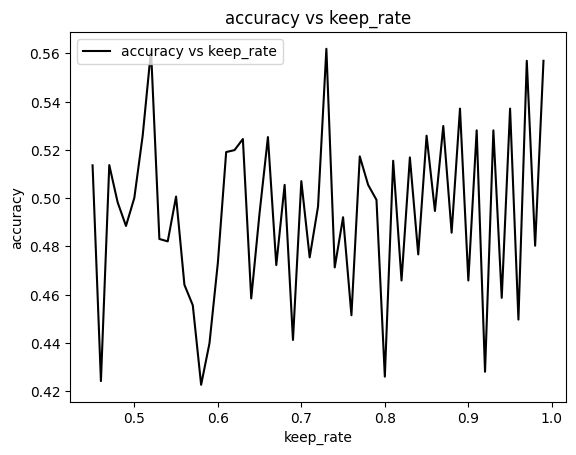

In [24]:
x_plot = np.arange(start = 0.45, stop = keep_val[keep_val.shape[0] -1], step = 0.01)
plt.plot(x_plot, arr_ret, color = 'black', label = 'accuracy vs keep_rate')
plt.title('accuracy vs keep_rate')
plt.xlabel('keep_rate')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.8)

In [26]:
ret = techniques.train_ELM_PRUNING(xin = X_train, yin = y_train, p = p_n, keep_rate = best_keep, control = True)
best_w = ret[0]
best_h = ret[1]
best_z = ret[2]

A acurácia é de 57.01754385964912%


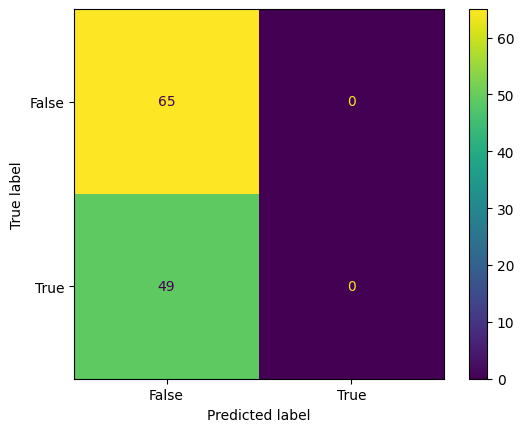

In [27]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_pred = techniques.test_ELM(xin = X_test, Z = best_z, W = best_w, classification = True, control = True)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
acc_ = accuracy_score(y_test, y_pred)
print(f"A acurácia é de {acc_*100}%")
plt.show()